This notebook provides examples to go along with the [textbook](https://underactuated.csail.mit.edu/lyapunov.html).  I recommend having both windows open, side-by-side!


In [1]:
import matplotlib.pyplot as plt
import mpld3
from IPython.display import Markdown, display
from pydrake.all import (
    MathematicalProgram,
    Solve,
    SymbolicVectorSystem,
    ToLatex,
    Variables,
)
from pydrake.symbolic import Polynomial

from underactuated import plot_2d_phase_portrait, running_as_notebook

if running_as_notebook:
    mpld3.enable_notebook()

# Verifying a Lyapunov candidate via SOS

Successfully verified Lyapunov candidate


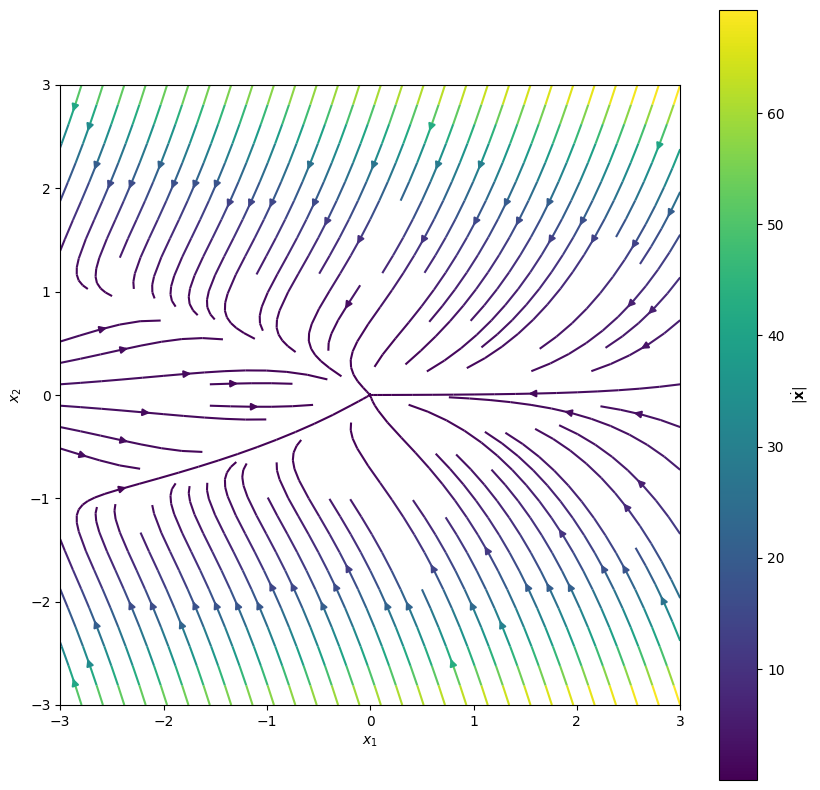

In [2]:
def sos_verify():
    prog = MathematicalProgram()
    x = prog.NewIndeterminates(2, "x")
    f = [-x[0] - 2 * x[1] ** 2, -x[1] - x[0] * x[1] - 2 * x[1] ** 3]

    V = x[0] ** 2 + 2 * x[1] ** 2
    Vdot = V.Jacobian(x).dot(f)

    prog.AddSosConstraint(-Vdot)

    result = Solve(prog)
    assert result.is_success()

    sys = SymbolicVectorSystem(state=x, dynamics=f)
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_2d_phase_portrait(sys, (-3, 3), (-3, 3))
    print("Successfully verified Lyapunov candidate")


sos_verify()

# Searching for a Lyapunov function via SOS

In [7]:
def sos_optimize():
    prog = MathematicalProgram()
    x = prog.NewIndeterminates(2, "x")
    f = [-x[0] - 2 * x[1] ** 2, -x[1] - x[0] * x[1] - 2 * x[1] ** 3]

    V = prog.NewSosPolynomial(Variables(x), 2)[0].ToExpression()
    print("Candidate:")

    display(Markdown("$V(x) = " + ToLatex(V) + "$"))
    prog.AddLinearConstraint(V.Substitute({x[0]: 0, x[1]: 0}) == 0)
    prog.AddLinearConstraint(V.Substitute({x[0]: 1, x[1]: 0}) == 1)
    Vdot = V.Jacobian(x).dot(f)

    prog.AddSosConstraint(-Vdot)

    result = Solve(prog)
    assert result.is_success()

    print("Solution:")
    display(
        Markdown(
            "$V(x) = "
            + ToLatex(
                Polynomial(result.GetSolution(V))
                .RemoveTermsWithSmallCoefficients(1e-5)
                .ToExpression(),
                6,
            )
            + "$"
        )
    )


sos_optimize()

the value of V is : (S(2,2) + 2 * (x(0) * x(1) * S(1,0)) + 2 * (x(0) * S(2,1)) + (pow(x(0), 2) * S(1,1)) + 2 * (x(1) * S(2,0)) + (pow(x(1), 2) * S(0,0)))
Candidate:


$V(x) = (S_{2,2} + 2x_{0} x_{1} S_{1,0} + 2x_{0} S_{2,1} + x_{0}^{2} S_{1,1} + 2x_{1} S_{2,0} + x_{1}^{2} S_{0,0})$

Solution:


$V(x) = (1.000000x_{0}^{2} + 2.000004x_{1}^{2})$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5ec0aeb-d006-4689-a009-180923e76318' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>